# Exploratory Analysis on Spotify Data



### Introduction to EDA

Exploratory Data Analysis aka 'EDA' refers to the process of analyzing and summarizing data sets to get insights that can help in understanding the underlying patterns, relationships, and trends in the data. The primary goal of EDA is to identify and summarize the key characteristics of the data, including its distribution, central tendency, variability, and outliers.

### About the Project

In this project, I have picked up a dataset from Kaggle which contains audio features for over million songs, obtained with the Spotify API. In this exploratory data analysis project, we will dive deep into a dataset related to songs. We will explore various aspects of songs, such as their duration, tempo, danceability, and more. I will also investigate the relationship between these song features.

I will use Python and various data analysis libraries like Pandas, Matplotlib, Numpy, and Seaborn to visualize and analyze the data. The insights we uncover from this analysis could be useful for musicians, streaming services to better understand their audience and create music that is more appealing and enjoyable to their listeners.

# Downloading the data

- Install opendataset to download data from Kaggle.
- Keep the dataset URL, username and kaggle key handy.
- Importing all the necesaary libraries for the project i.e. Numpy, Pandas, Matplotlib, seaborn, etc.

In [2]:
!pip install opendatasets --upgrade --quiet

import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?select=dataset.csv'

od.download(dataset_url) 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shraku
Your Kaggle Key: ········


100%|██████████| 8.17M/8.17M [00:02<00:00, 3.15MB/s]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Glossary

The following list contains few technical terms and definitions which will be used throughout the project.

- Acousticness: Confidence measure of whether a track is acoustic.

- Danceability: How suitable a track is for dancing.

- Energy: How intense and active a track is.

- Instrumentalness: Proportion of instrumental parts in a track.

- Loudness: Overall loudness of the track, in decibels (dB).

- Liveness: Detects live audience in a track. Represents the probability that a track was performed live.

- Mode: Whether the track is in major mode (1) or minor (0).

- Speechiness: Proportion of spoken words in the track.

- Tempo: Overall tempo of a track, in beats per minute (BPM).

- Valence: Measures how positive a track sounds, from 1 (extremely positive) to 0 (extremely negative).

# Data preparation and Cleaning

- By using Pandas load the dataset.
- Take first look at data.
- Try to idnetify missing or incorect values.

In [4]:

data_filename = './-spotify-tracks-dataset/dataset.csv'

df = pd.read_csv(data_filename)

df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics_df = df.select_dtypes(include=numerics)
len(numerics_df.columns)

15

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [9]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [10]:
sort_df = df.sort_values("popularity",ascending=False)
sort_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.003830,0.000007,0.3710,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95148,95148,34olARXYeAnlabWyWtpGxe,Edgar Joel;Anthony Colon,Era Salsa para Bailar,Hasta El Sol De Hoy,0,281960,False,0.585,0.761,...,-9.441,1,0.0321,0.537000,0.000146,0.1040,0.828,167.971,4,salsa
95145,95145,6abSq0hivs5RJtraGRKKhS,Ray Barretto,Era Salsa para Bailar,Descarga La Moderna,0,266600,False,0.703,0.510,...,-13.915,1,0.0454,0.800000,0.394000,0.0879,0.858,113.211,4,salsa
68256,68256,1U6K8MHPdkqaBoJOfhXjPx,Jhayco,Reggeaton Imperdible,Sensual Bebé,0,209146,True,0.776,0.629,...,-6.090,1,0.0505,0.026800,0.000000,0.1140,0.104,97.066,4,latino
68252,68252,5Mktfl3xR4CNPO0u5QZRal,Jhayco;Bad Bunny,Bájale como 7500,CÓMO SE SIENTE - Remix,0,227520,True,0.807,0.606,...,-8.871,0,0.0872,0.094600,0.000000,0.1190,0.304,92.988,4,latino


In [11]:
categories = df.select_dtypes(exclude=np.number).columns
print('Categorical columns:', categories)
numerical = df.select_dtypes(include=np.number).columns
print('Numerical columns:', numerical)

Categorical columns: Index(['track_id', 'artists', 'album_name', 'track_name', 'explicit',
       'track_genre'],
      dtype='object')
Numerical columns: Index(['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


# Exploritory analysis

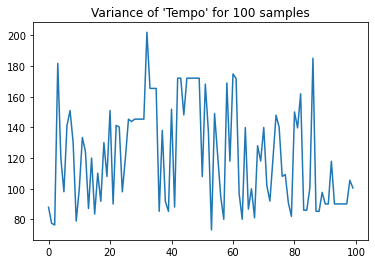

In [12]:

plt.plot(df.tempo[:100]);
plt.title("Variance of 'Tempo' for 100 samples" );

As per the above graph, the tempo of a song can range from being as low as 60 bpm to going as high as 180 bpm. The tempo depends usually on the type of song, dance music/party songs tend to have a higher tempo whereas lower tempo is usually associated love songs or sad songs.

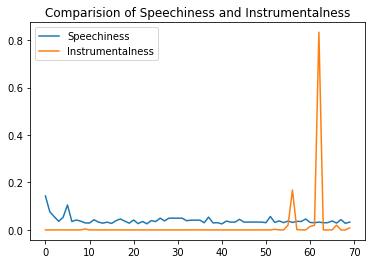

In [13]:

plt.plot(df.speechiness[:70], label='Speechiness');
plt.plot(df.instrumentalness[:70], label='Instrumentalness');
plt.title('Comparision of Speechiness and Instrumentalness');
plt.legend();

As per the above graph the speechiness (proportion of spoken words in the track) is significantly higher when instrumentalness (proportion of instrumental parts in a track) is low and vice-versa. It is also an expected result as the songs which tend to have less words would usually have long spans of only music and no singing.

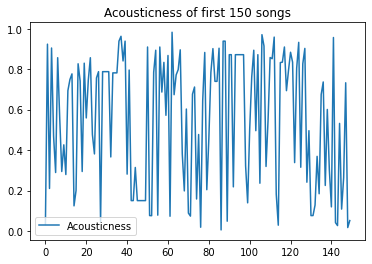

In [14]:
plt.plot(df.acousticness[:150], label='Acousticness');
plt.title('Acousticness of first 150 songs');
plt.legend();

Upon observering the sample, we see that a fair share of songs in the first 150 sample are acoustic. Acoustic music is more simplistic and quieter due to which it has it's own audience. In the next step, lets calculate the total percent of songs which are definelty acoustic, for this lets set the confidence level at 0.8

In [15]:
print(df.value_counts(df.acousticness > 0.8))
print(f"The percent of Acoustic songs is {(358938/(845087 + 358938))} %")

acousticness
False    98208
True     15792
dtype: int64
The percent of Acoustic songs is 0.2981150723614543 %


Therefore, 358938 songs out of all the songs fall under acoustic category.

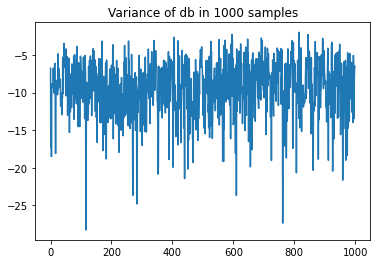

In [16]:
plt.plot(df.loudness[:1000], label='Loudness in db');
plt.title('Variance of db in 1000 samples');

Most songs are within the range of -20db and -10db. There are a few outliers on both ends as some songs can be extermely loud and some can be hard to hear if not recorded properly.

# Ask and Answer.

## 1.Find the top 10 artists with the maximum number of songs.

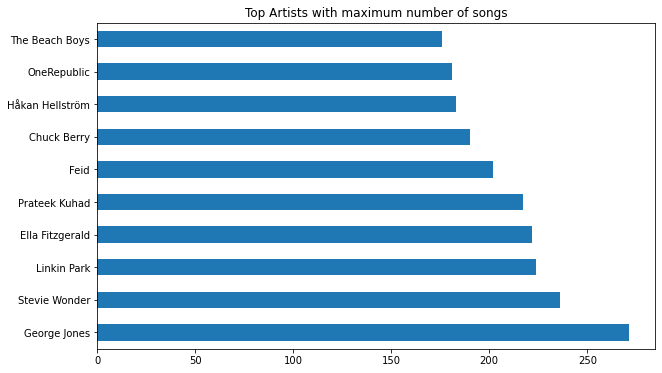

In [36]:
plt.figure(figsize=(10,6))
df.artists.value_counts()[1:11].plot(kind='barh', title='Top Artists with maximum number of songs');
# Using [1:11] as per the data maximun songs belong to other various artists which are expicitily mentioned. 

## 2.Find top 10 loudest song.

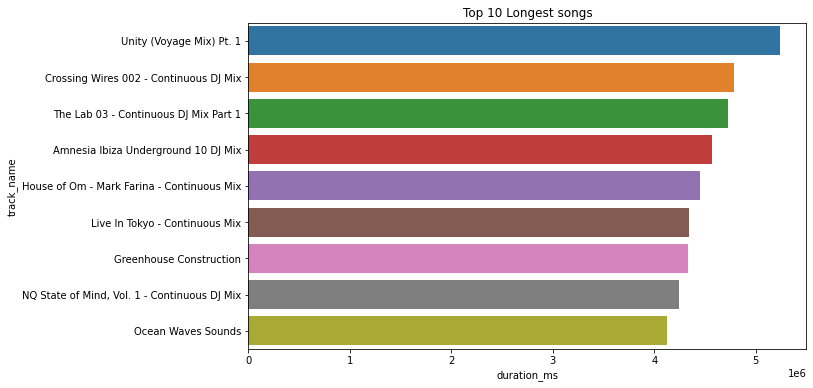

In [27]:
long_songs = df[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x="duration_ms", y="track_name", data = long_songs)
plt.title("Top 10 Longest songs")
plt.show()

## 3.Create a heatmap showing correlation among various features/variable ?


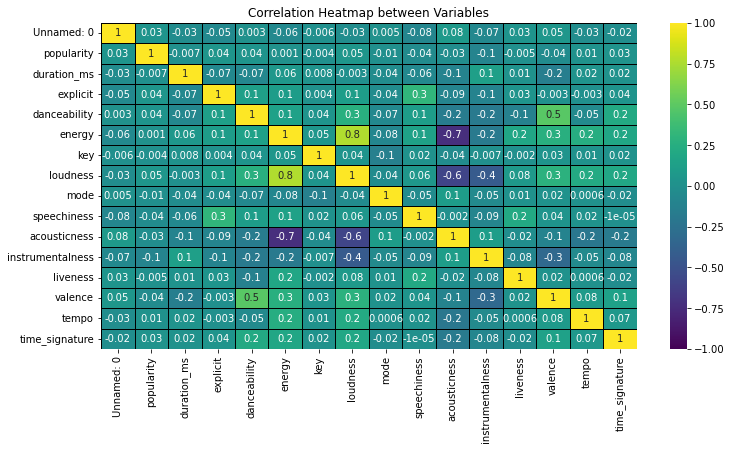

In [18]:
corr_df=df.corr(method="pearson")
plt.figure(figsize=(12,6))
heatmap=sns.heatmap(corr_df, annot=True, vmin=-1, fmt=".1g", vmax=1, cmap="viridis", linewidth=1, linecolor="black")
heatmap.set_title("Correlation Heatmap between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90);

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. The above heatmap shows the correlation between the different variables of tha dataset. As evident, the 'loudness' and 'energy' are highly correlated.

## 4.What percentage of the total songs is 'explicit' ? (Containg foul language)


The percentage of explicit songs is 8.55%.


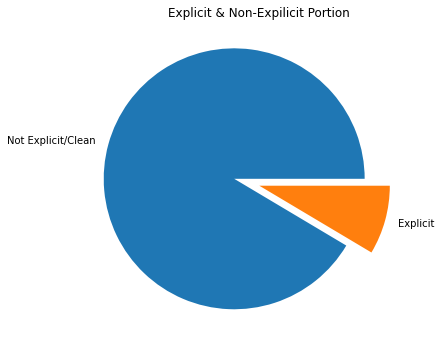

In [35]:
text = ['Not Explicit/Clean' , 'Explicit']
array = [df.explicit.value_counts()[0],df.explicit.value_counts()[1]]
plt.figure(figsize=(10,6))
plt.pie(array, labels=text, explode = [0.2,0]);
plt.title('Explicit & Non-Expilicit Portion');

print("The percentage of explicit songs is {}%.".format((array[1]/(array[1]+array[0]))*100))

## 5.Compare the danceability of a song to the tempo(bpm). Does higher danceability always mean higher tempo?

Lets use line graph for the same. We have taken a sample of 150 rows, sorted them in ascending order of danceability and plotted the graph.

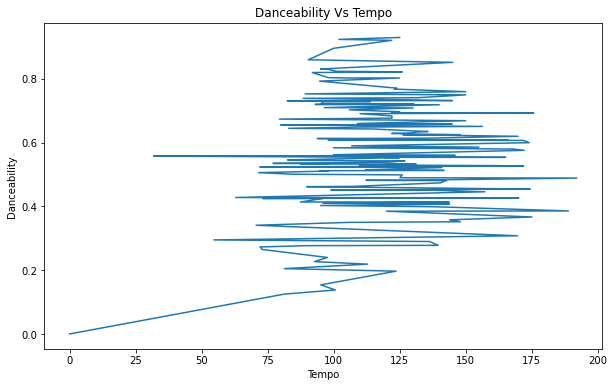

In [34]:
data = df.sample(n=150)

data = data.sort_values(by='danceability', ascending=True)
plt.figure(figsize=(10,6))
plt.plot(data.tempo, data.danceability);
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.title('Danceability Vs Tempo');

## 6.Compare energy and danceability of the songs and look for any trends?


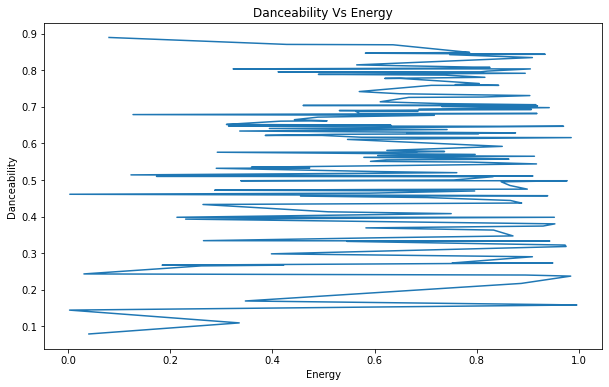

In [33]:
data = df.sample(n=150)

data = data.sort_values(by='danceability', ascending=True)
plt.figure(figsize=(10,6))
plt.plot( data.energy, data.danceability);
plt.xlabel('Energy');
plt.ylabel('Danceability');
plt.title('Danceability Vs Energy');


## 7.Find the key of the songs in major and minor mode.
Major mode = 1 and Minor mode = 0 (Given as per the Kaggle dataset.)

'mode' is a pandas function as well, hence renaming the column to avoid any ambiguity.

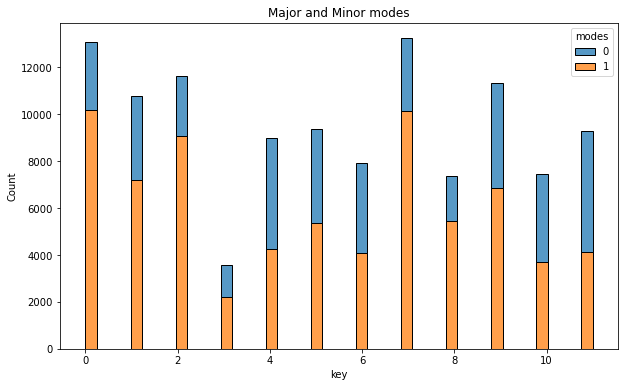

In [32]:
df.rename(columns = {'mode':'modes'}, inplace = True)


#Plotting graphs. 
plt.figure(figsize=(10,6))
sns.histplot(x=df.key, hue = df.modes, multiple="stack").set(title='Major and Minor modes');

##  8.Valence measures how positive a track sounds, from 1 (extremely positive) to 0 (extremely negative), hence lets analyse the dataset for the same.

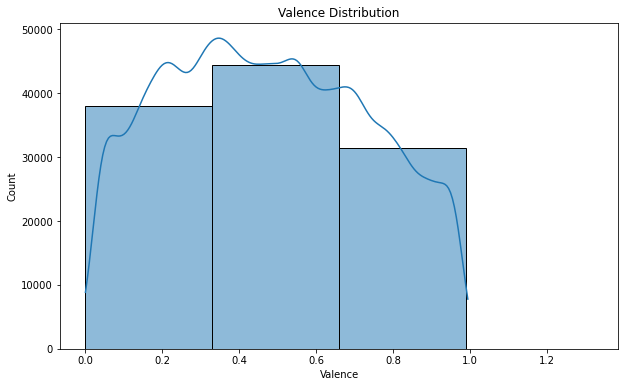

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df.valence, binwidth=0.33, kde=True).set( title='Valence Distribution', xlabel='Valence', ylabel='Count');

## 9.Find correlation between loudness and energy.

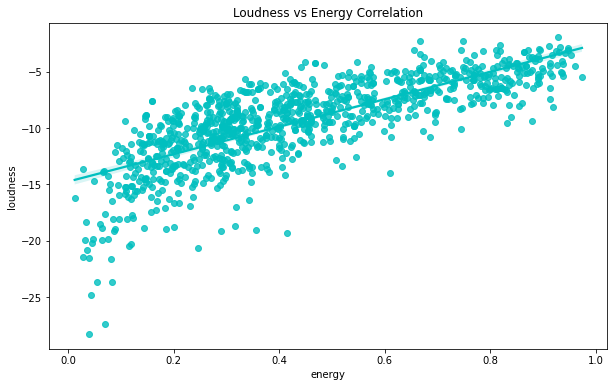

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(data=df[:1000], y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation");

# 5. Summary and Insights

On completing the analysis, I have drawn the following conclusions:

- As per the dataset, the maximum number of songs are sung by the band 'Vitamin String Quartet' which is equal to 1577.

- The maximum number of songs were released by: Dan Gibson's Solitudes, in the year 2013., with a total of 906 songs.

- The features 'energy' and 'loudness' are highly correlated, whereas 'acousticness' and 'loudness' are negatively correlated.

- The number of songs released in January is significantly higher than other months. The reason for the same could be that artists want their songs to be on the music charts like Billboards throughout the year so that eventually they can win an award.

- The percentage of explicit songs is 6.86%, i.e. these songs contain foul language or cuss words.

- The higher tempo of the song doesn't always mean higher danceability, as per the plot, the most danceable songs are between the range of 80bpm to 120bpm.

- The most danceable song has a medium level of energy, mostly around 0.5.

- Mostly the songs with the 0th key (C) are under the major mode, whereas the maximum songs under the minor key are with the 9th key

- The longest song of the dataset is 'Bargrooves Deluxe Edition 2018 Mix 2' which is 101 minutes long since it's a mixtape (a Compilation) while the average value of a song's duration is 4.14 minutes.

- As per the valence value most of the songs are extremely positive.

Through this project, I have deduced some important highlights which will help others generate hypotheses for further analysis or any future projects such as:

- By adding a column that represents the song's ranking during the year it was released (for example: Billboards or MTV Hits) could result in more elaborate analysis of the dataset.

- Utilizing this research for creating a song recommendation machine learning model.

-Music Genre Classification model to predict the genre of a particular song.

### References:

- Kaggle dataset discussions page
- Towards Data Science blog
- Plotly documentation
- Seaborn gallery
- Matplotlib tutorial

-Project by Shraddha Kulkarni.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>